In [27]:
from sklearn.preprocessing import MinMaxScaler
from keras import models 
from keras import layers 
from keras.layers import Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("fliter_train_data_2.csv")
safe_type = data["safe_type"]
features = data.iloc[:, 2:]

test = pd.read_csv("fliter_test_data_2.csv")
id_ = test["id"]
test_features = test.iloc[:, 1:]

In [32]:
min_max_scaler = MinMaxScaler()
train_data = min_max_scaler.fit_transform(features)
test_data = min_max_scaler.fit_transform(test_features)

In [40]:
train_data, test_data, train_label, test_label = train_test_split(train_data, 
                                                                  safe_type, 
                                                                  test_size=0.2, 
                                                                  random_state=0)

In [30]:
def build_model(dimension): 
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='relu', input_shape=(dimension,))) 
    model.add(Dropout(0.2))
    model.add(layers.Dense(128, activation='relu')) 
    model.add(Dropout(0.2))
    model.add(layers.Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid')) 
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy']) 
    return model

In [41]:
model = build_model(train_data.shape[1])
model.fit(train_data, 
          train_label, 
          epochs=100, 
          batch_size=524)

Epoch 1/100
23983/23983 [==============================] - 1s 35us/step - loss: 0.4526 - acc: 0.8262
Epoch 2/100
23983/23983 [==============================] - 0s 12us/step - loss: 0.3507 - acc: 0.8834
Epoch 3/100
23983/23983 [==============================] - 0s 12us/step - loss: 0.3146 - acc: 0.8981
Epoch 4/100
23983/23983 [==============================] - 0s 13us/step - loss: 0.2854 - acc: 0.9068
Epoch 5/100
23983/23983 [==============================] - 0s 13us/step - loss: 0.2603 - acc: 0.9161
Epoch 6/100
23983/23983 [==============================] - 0s 17us/step - loss: 0.2448 - acc: 0.9219
Epoch 7/100
23983/23983 [==============================] - 0s 13us/step - loss: 0.2351 - acc: 0.9266
Epoch 8/100
23983/23983 [==============================] - 0s 12us/step - loss: 0.2227 - acc: 0.9324
Epoch 9/100
23983/23983 [==============================] - 0s 13us/step - loss: 0.2119 - acc: 0.9345
Epoch 10/100
23983/23983 [==============================] - 0s 12us/step - loss: 0.2051 - a

In [43]:
predict = model.predict_classes(test_data)

In [42]:
def plot(test_label, y_pred, model):
    font = {"color": "darkred",
            "size": 13, 
            "family" : "serif"}

    accs = accuracy_score(test_label, y_pred)
    fpr, tpr, _ = metrics.roc_curve(test_label,  y_pred)
    auc = metrics.roc_auc_score(test_label, y_pred)
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label="{}, auc=".format(model)+str(auc), color='green', linewidth=2)
    ax.set_title("ROC curve", fontdict=font)
    leg = ax.legend(loc="best")
    text = leg.get_texts()
    _ = plt.setp(text, color="blue") 

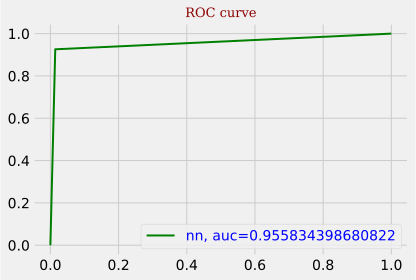

In [44]:
plot(test_label, predict, "nn")

In [38]:
result = pd.DataFrame()
result["id"] = id_
result["safe_type"] = predict
result.to_csv("result.csv", encoding="utf-8", index=False)